# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [11]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def PolyCoefficients2(x,x0,coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


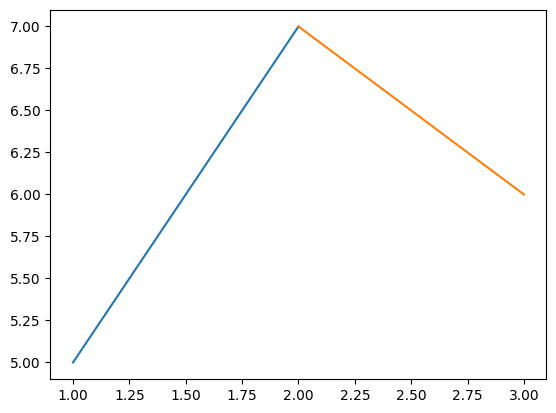

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


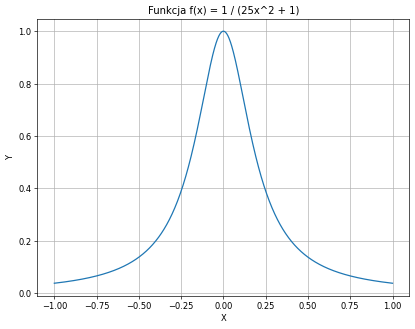

In [3]:
x = np.linspace(-1,1,1000)
f = lambda x: 1/(25 * x ** 2 + 1)
y = f(x)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x, y)
plt.title("Funkcja f(x) = 1 / (25x^2 + 1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

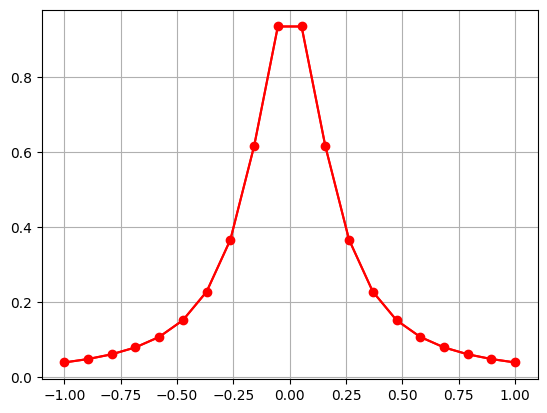

In [4]:
# biblioteka scipy
x = np.linspace(-1,1,20)
f = lambda x: 1/(25 * x ** 2 + 1)
y = f(x)
tck, u = splprep([x,y],s=0)
new_points = splev(u,tck)
fig, ax = plt.subplots()

ax.plot(x, y,'ro-')
ax.plot(new_points[0], new_points[1],'r-')
plt.grid()
plt.show()



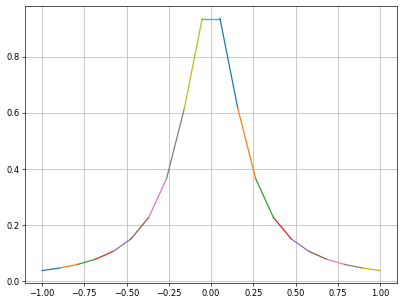

In [5]:
x = np.linspace(-1,1,20)
f = lambda x: 1/(25 * x ** 2 + 1)
y = f(x)
a,b = main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]
plt.figure(figsize=(8, 6), dpi=60)
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

plt.grid()
plt.show()

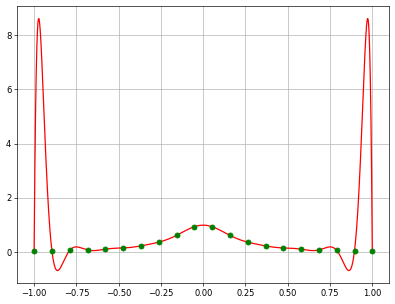

In [6]:
from scipy.interpolate import barycentric_interpolate

x = np.linspace(-1,1,20)
f = lambda x: 1/(25 * x ** 2 + 1)
y = f(x)

y_bar = barycentric_interpolate(x,y,np.linspace(-1,1,1000))
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(np.linspace(-1,1,1000),y_bar,'r')
plt.plot(x,y,'go',label = 'wezly interpolacji')
plt.grid()
plt.show()



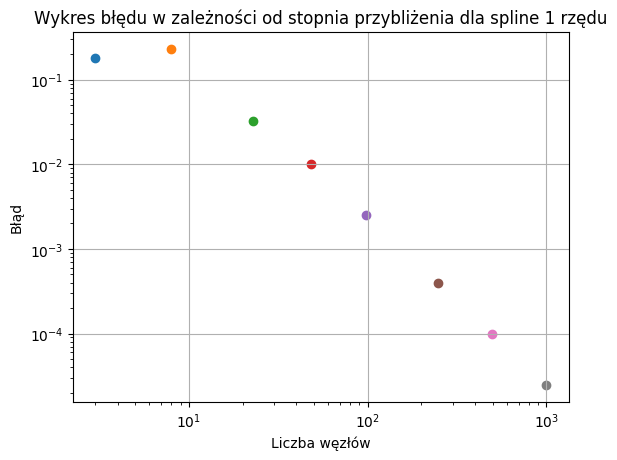

In [7]:
x = np.linspace(-1,1, 1000)
f = lambda x: 1 / (25 * x **2 + 1)
y = f(x)
ilosc_wezlow = [5, 10, 25, 50, 100, 250,500, 1000]

for i in ilosc_wezlow:

    x = np.linspace(-1,1,i)
    a,b = main.first_spline(x, f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_nodes = np.array([])
    x_nodes = np.array([])

    for i in range(len(x)-1):
        x_nodes_new = np.linspace(x[i], x[i+1],10)
        y_nodes_new = PolyCoefficients(x_nodes_new , f_c[i])
        y_nodes = np.append(y_nodes, y_nodes_new)
        x_nodes = np.append(x_nodes, x_nodes_new)

    error = main.L_inf(y_nodes,f(x_nodes))
    plt.scatter(i,error)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od stopnia przybliżenia dla spline 1 rzędu")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


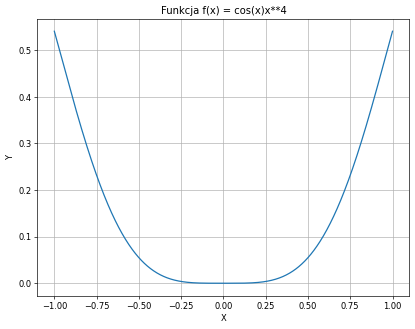

In [8]:
x = np.linspace(-1,1,1000)
f = lambda x: np.cos(x) * x ** 4
y = f(x)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x, y)
plt.title("Funkcja f(x) = cos(x)x**4")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

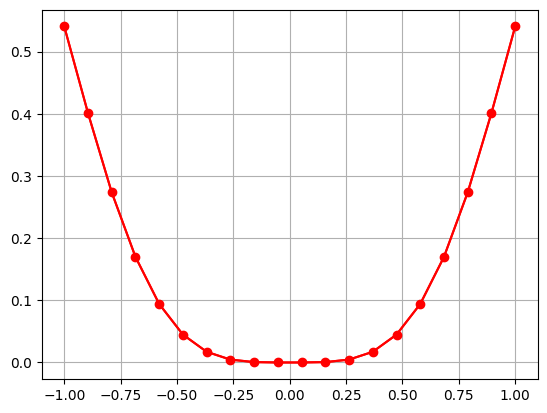

In [9]:
# biblioteka scipy
x = np.linspace(-1,1,20)
f = lambda x: np.cos(x) * x ** 4
y = f(x)
tck, u = splprep([x,y],s=0)
new_points = splev(u,tck)

fig, ax = plt.subplots()
ax.plot(x, y,'ro-')
ax.plot(new_points[0], new_points[1],'r-')
plt.grid()
plt.show()

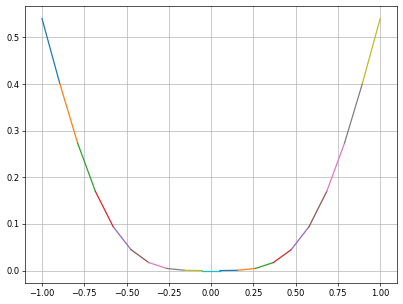

In [10]:
x = np.linspace(-1,1,20)
f = lambda x: np.cos(x) * x ** 4
y = f(x)
a,b = main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]
plt.figure(figsize=(8, 6), dpi=60)
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))
plt.grid()
plt.show()

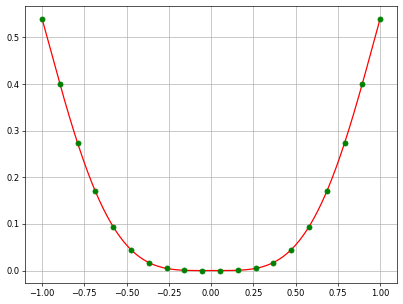

In [11]:
x = np.linspace(-1,1,20)
f = lambda x: np.cos(x) * x ** 4
y = f(x)

y_bar = barycentric_interpolate(x,y,np.linspace(-1,1,1000))
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(np.linspace(-1,1,1000),y_bar,'r')
plt.plot(x,y,'go',label = 'wezly interpolacji')
plt.grid()
plt.show()

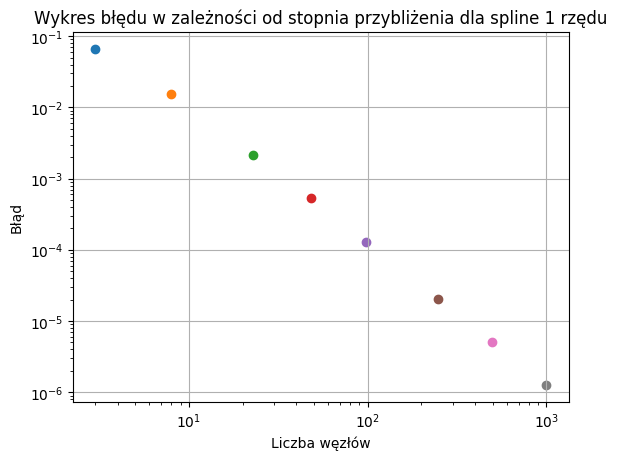

In [21]:
x = np.linspace(-1,1, 1000)
f = lambda x: np.cos(x) * x ** 4
y = f(x)
ilosc_wezlow = [5, 10, 25, 50, 100, 250,500, 1000]

for i in ilosc_wezlow:

    x = np.linspace(-1,1,i)
    a,b = main.first_spline(x, f(x))
    f_c = [[b[i],a[i]] for i in range(len(a))]

    y_nodes = np.array([])
    x_nodes = np.array([])

    for i in range(len(x)-1):
        x_nodes_new = np.linspace(x[i], x[i+1],10)
        y_nodes_new = PolyCoefficients(x_nodes_new , f_c[i])
        y_nodes = np.append(y_nodes, y_nodes_new)
        x_nodes = np.append(x_nodes, x_nodes_new)

    error = main.L_inf(y_nodes,f(x_nodes))
    plt.scatter(i,error)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od stopnia przybliżenia dla spline 1 rzędu")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


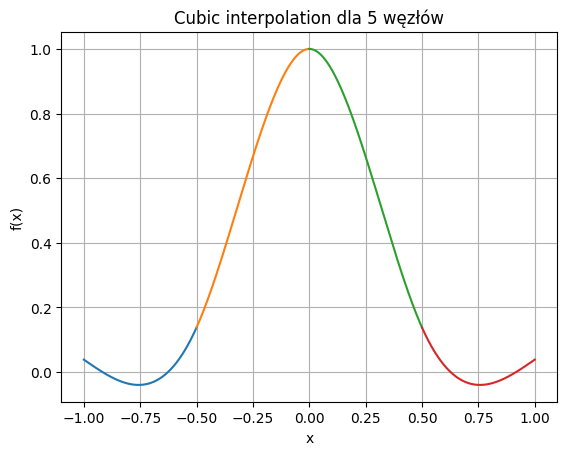

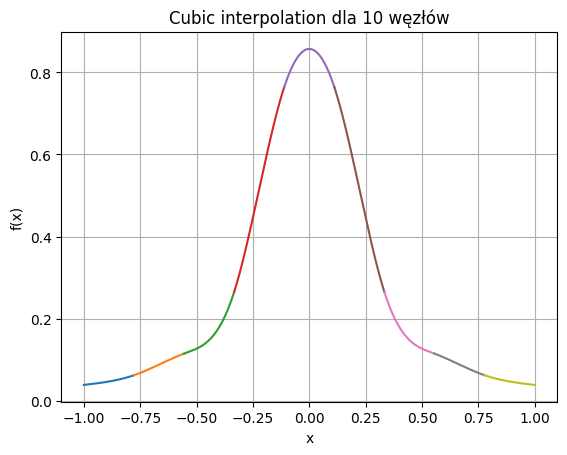

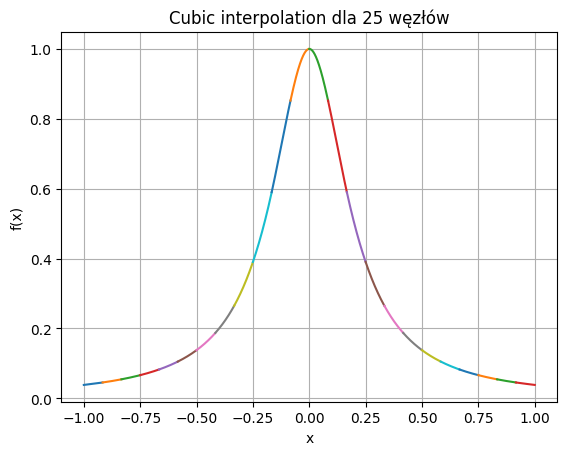

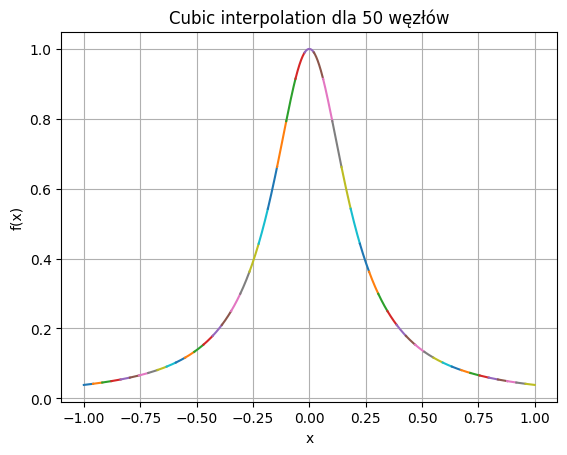

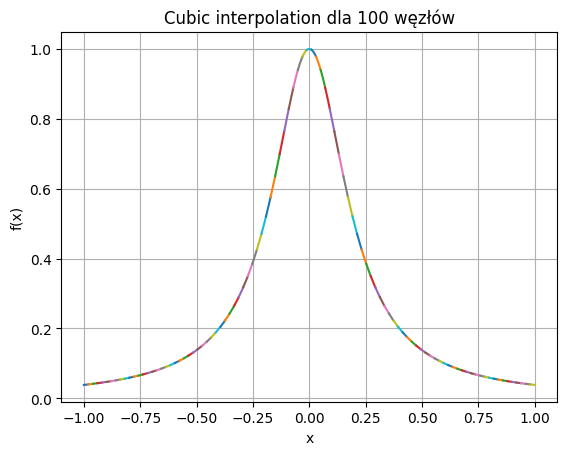

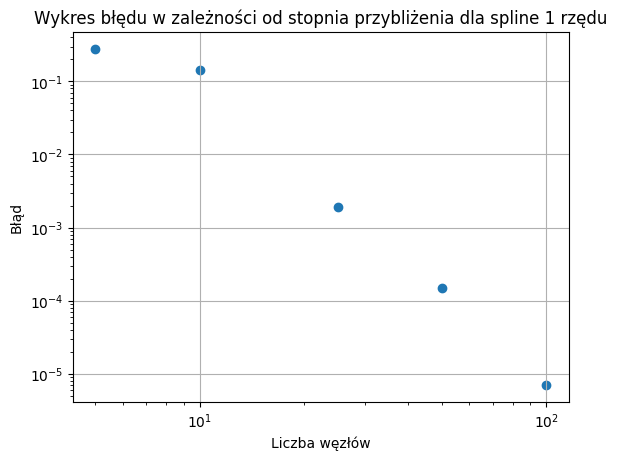

In [32]:
function = lambda x: 1 / (25 * x **2 + 1)
error = []
ilosc_wezlow = [5, 10, 25, 50, 100] # dla 250 robi się już bardzo długo
for i in ilosc_wezlow:
    x = np.linspace(-1,1,i)
    y = function(x)

    Y = np.array([])
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

    for j in range(len(x) - 1):
        x_spl = np.linspace(x[j],x[j+1],1000)
        y_spl = PolyCoefficients2(x_spl,x[j],f[j])

        Y = np.append(Y, y_spl)
        X = np.append(X, x_spl)

        plt.plot(x_spl, y_spl)
        plt.title('Cubic interpolation dla {0} węzłów'.format(j+2))
        plt.ylabel('f(x)')
        plt.xlabel('x')
    plt.grid()
    plt.show()

    error.append(main.L_inf(Y,function(X)))

plt.scatter(ilosc_wezlow,error)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od ilosci wezlow dla splinow cubicznych")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


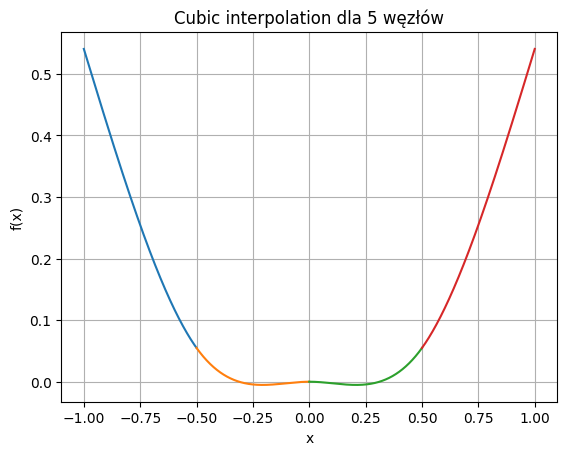

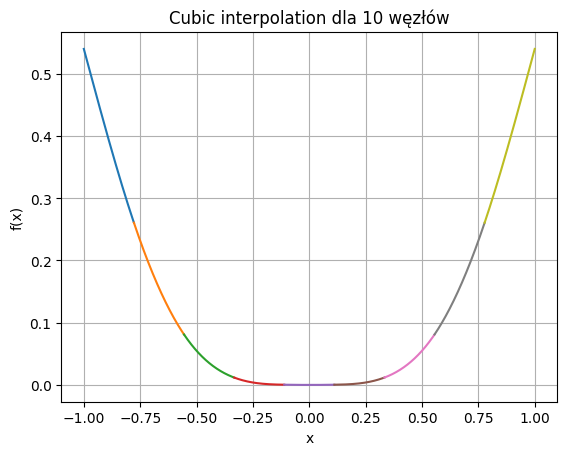

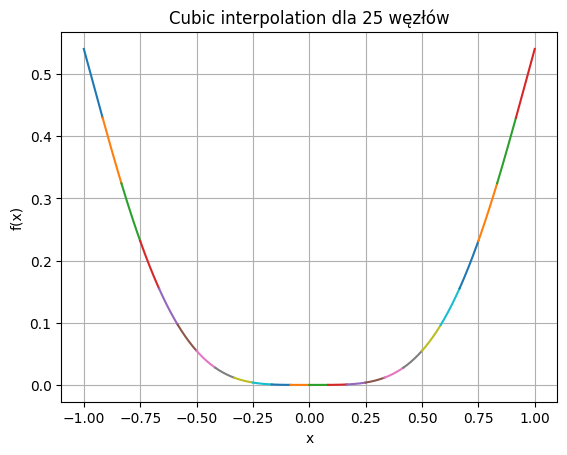

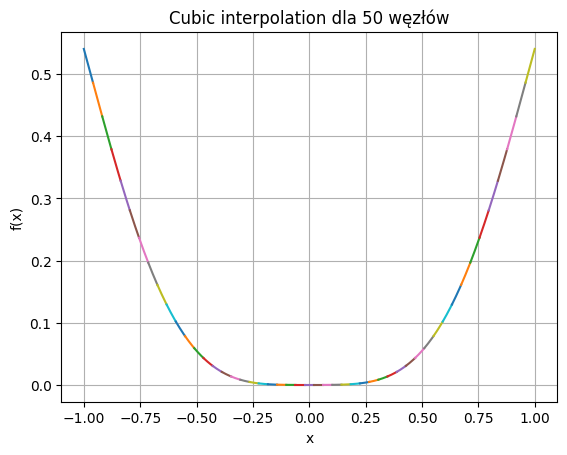

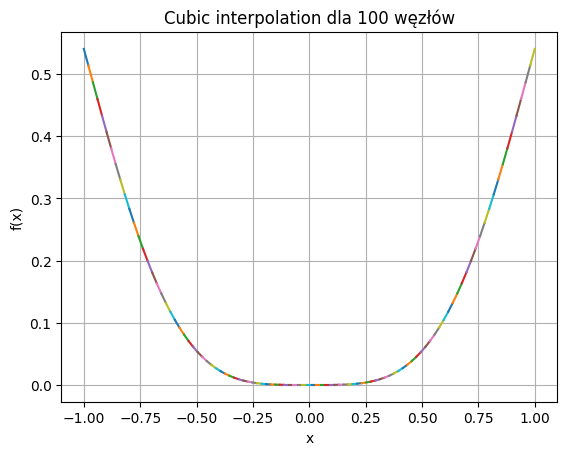

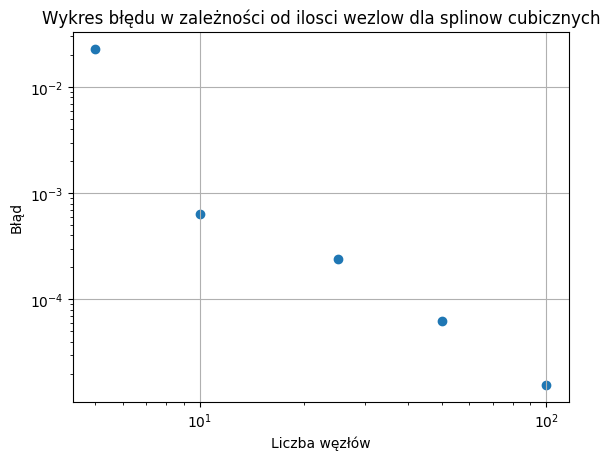

In [33]:
function = lambda x: np.cos(x) * x ** 4
error = []
ilosc_wezlow = [5, 10, 25, 50, 100] # dla 250 robi się już bardzo długo
for i in ilosc_wezlow:
    x = np.linspace(-1,1,i)
    y = function(x)

    Y = np.array([])
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

    for j in range(len(x) - 1):
        x_spl = np.linspace(x[j],x[j+1],1000)
        y_spl = PolyCoefficients2(x_spl,x[j],f[j])

        Y = np.append(Y, y_spl)
        X = np.append(X, x_spl)

        plt.plot(x_spl, y_spl)
        plt.title('Cubic interpolation dla {0} węzłów'.format(j+2))
        plt.ylabel('f(x)')
        plt.xlabel('x')
    plt.grid()
    plt.show()

    error.append(main.L_inf(Y,function(X)))

plt.scatter(ilosc_wezlow,error)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od ilosci wezlow dla splinow cubicznych")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

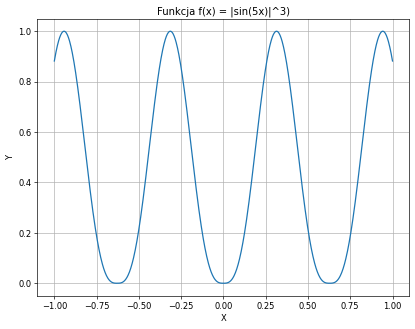

In [5]:
# oryginał
f = lambda x : (abs(np.sin(5*x)))**3
x = np.linspace(-1,1,1000)
y = f(x)
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x, y)
plt.title("Funkcja f(x) = |sin(5x)|^3)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


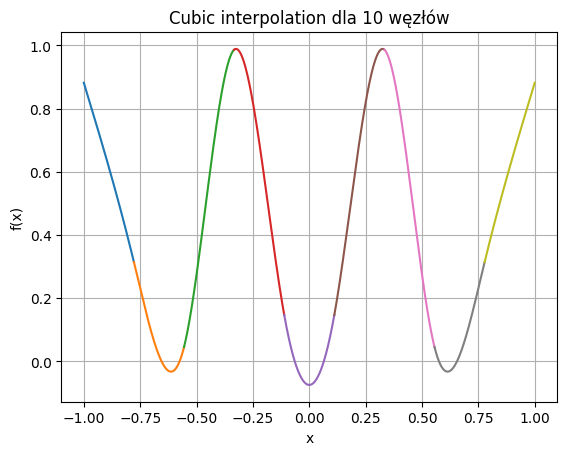

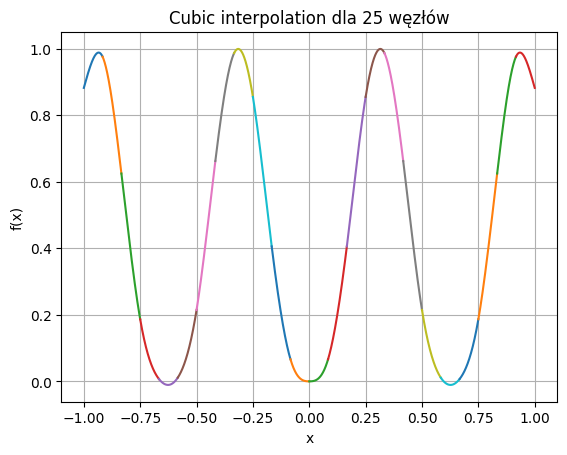

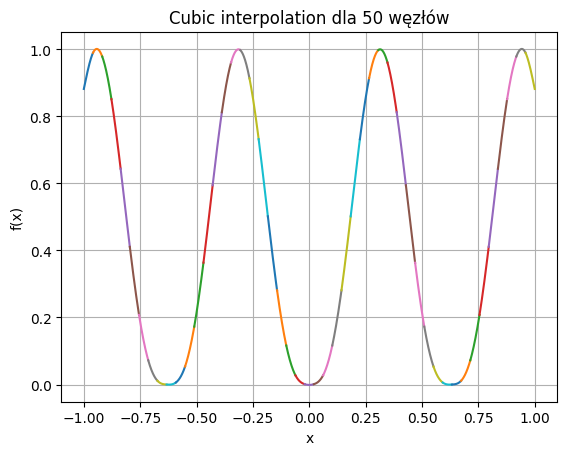

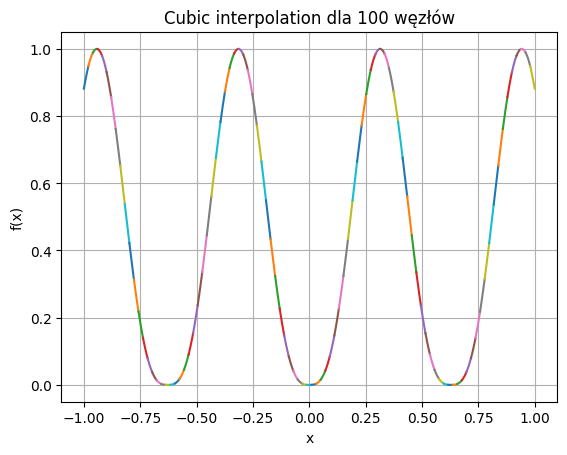

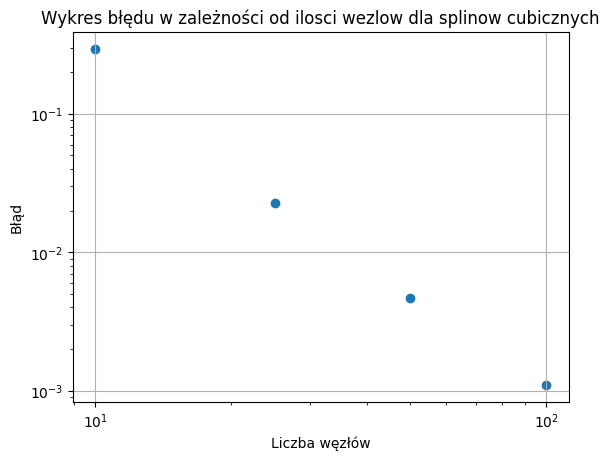

In [37]:
function = lambda x: (abs(np.sin(5*x)))**3
error = []
ilosc_wezlow = [10, 25, 50, 100] # dla 250 robi się już bardzo długo
for i in ilosc_wezlow:
    x = np.linspace(-1,1,i)
    y = function(x)

    Y = np.array([])
    X = np.array([])

    b, c, d = main.cubic_spline(x, y)
    f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]

    for j in range(len(x) - 1):
        x_spl = np.linspace(x[j],x[j+1],1000)
        y_spl = PolyCoefficients2(x_spl,x[j],f[j])

        Y = np.append(Y, y_spl)
        X = np.append(X, x_spl)

        plt.plot(x_spl, y_spl)
        plt.title('Cubic interpolation dla {0} węzłów'.format(j+2))
        plt.ylabel('f(x)')
        plt.xlabel('x')
    plt.grid()
    plt.show()

    error.append(main.L_inf(Y,function(X)))

plt.scatter(ilosc_wezlow,error)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od ilosci wezlow dla splinow cubicznych")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

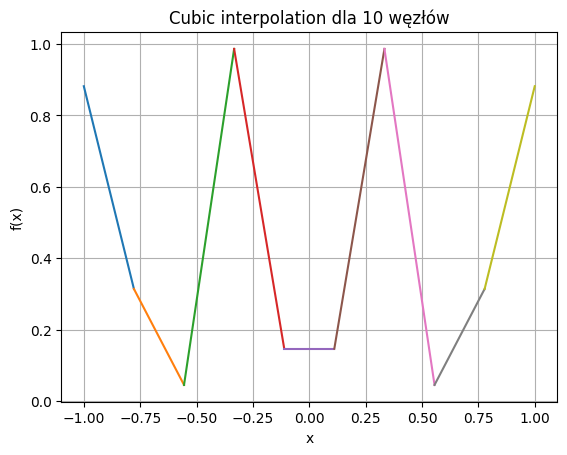

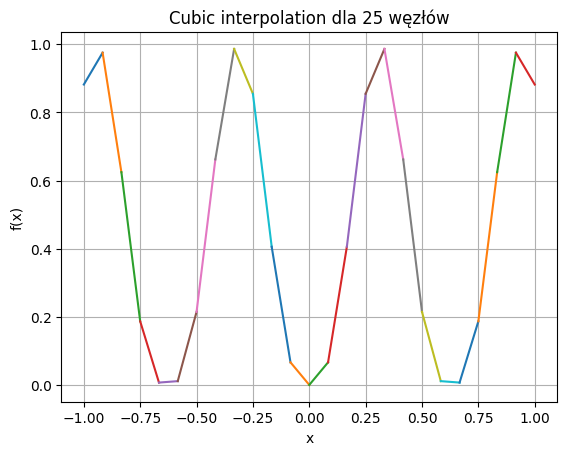

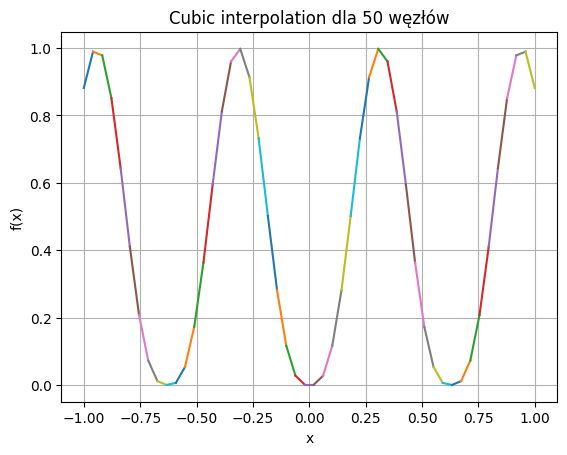

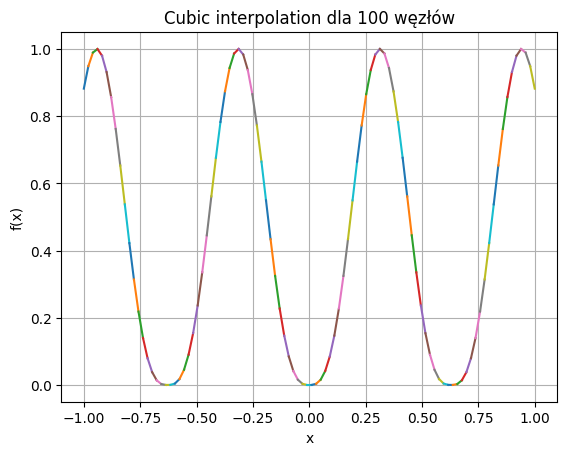

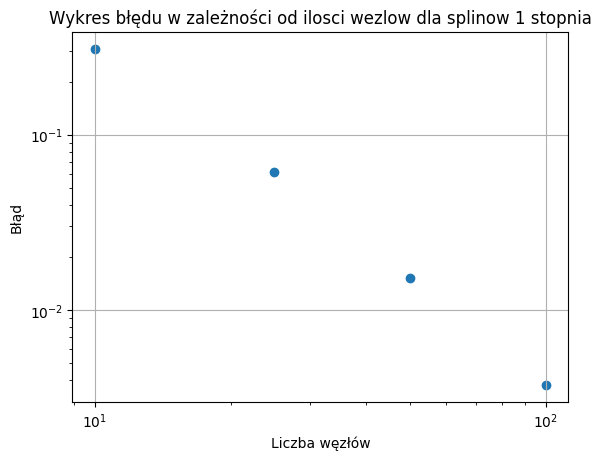

In [43]:
function = lambda x: (abs(np.sin(5*x)))**3
error_1 = []
ilosc_wezlow = [10, 25, 50, 100] # dla 250 robi się już bardzo długo
for i in ilosc_wezlow:
    x = np.linspace(-1,1,i)
    y = function(x)

    Y = np.array([])
    X = np.array([])

    x = np.linspace(-1, 1, i)
    a,b = main.first_spline(x, function(x))
    f = [[b[i],a[i]] for i in range(len(a))]

    for j in range(len(x)-1):
        x_spl = np.linspace(x[j], x[j+1],10)
        y_spl = PolyCoefficients(x_spl , f[j])
        Y = np.append(Y, y_spl)
        X = np.append(X, x_spl)

        plt.plot(x_spl, y_spl)
    plt.title('Cubic interpolation dla {0} węzłów'.format(j+2))
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.grid()
    plt.show()

    error_1.append(main.L_inf(Y,function(X)))

plt.scatter(ilosc_wezlow,error_1)
plt.semilogy()
plt.semilogx()
plt.title("Wykres błędu w zależności od ilosci wezlow dla splinow 1 stopnia")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()

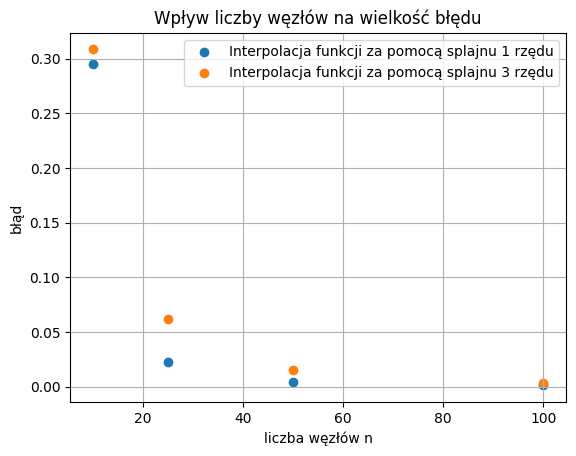

In [44]:
plt.scatter(ilosc_wezlow, error, label = 'Interpolacja funkcji za pomocą splajnu 1 rzędu')
plt.scatter(ilosc_wezlow, error_1, label = 'Interpolacja funkcji za pomocą splajnu 3 rzędu')
plt.title('Wpływ liczby węzłów na wielkość błędu')
plt.xlabel('liczba węzłów n')
plt.ylabel('błąd')
plt.legend()
plt.grid()
plt.semilogy
plt.show()

WNIOSKI:
Na dzisiejszych laboratoriach omawialiśmy temat splinów 1 rzędu oraz splinów cubicznych. W pierwszych zadaniach prównywaliśmy splajny do funkcji barycentrycznych. Sprawdzaliśmy jakie różnice są między interpolacją barycentryczną a tworzeniem wykresów funkcji za pomocą funkcji liniowych. W dalszej części zajęliśmy się splinami cubicznymi czyli takimi któe przybliżają funcje na danym przedziale za pomocą wielomianów trzeciego stopnia. W ostatnim zadaniu porównaliśmy obie metody i sprawdzilismy jak wyglądają wykresy dla identycznych ilości węzłów.